In [44]:
import pandas as pd

In [45]:
import matplotlib.pyplot as plt

In [46]:
import seaborn as sns

In [47]:
df = pd.read_csv('life_expectancy.csv')

In [49]:
df.head()

,Entity,Code,Year,Life expectancy - Sex: all - Age: 0 - Variant: estimates
0,Afghanistan,AFG,1950,28.156
1,Afghanistan,AFG,1951,28.584
2,Afghanistan,AFG,1952,29.014
3,Afghanistan,AFG,1953,29.452
4,Afghanistan,AFG,1954,29.698


**nettoyer le données**

Voir les colonnes disponibles

In [50]:
print(df.columns)

Index(['Entity', 'Code', 'Year',
       'Life expectancy - Sex: all - Age: 0 - Variant: estimates'],
      dtype='object')


garder uniquement les colonnes utiles (pays, année, espérance de vie)

In [51]:
df = df.rename(columns={
    'Entity': 'country',
    'Year': 'year',
    'Life expectancy - Sex: all - Age: 0 - Variant: estimates': 'life_expectancy'
})

In [52]:
df = df[['country', 'year', 'life_expectancy']]

Filtrer les années

In [62]:
df = df[(df['year'] >= 1950) & (df['year'] <= 2023)]

Vérifier les valeurs manquantes

In [63]:
print(df.isna().sum())

country                0
year                   0
life_expectancy        0
region             18500
dtype: int64


Supprimer les lignes avec données manquantes

In [64]:
df = df.dropna()

**Analyser les tendances**

In [65]:
df_global = df.groupby('year')['life_expectancy'].mean().reset_index()

**Visualiser l’évolution de l’espérance de vie mondiale**

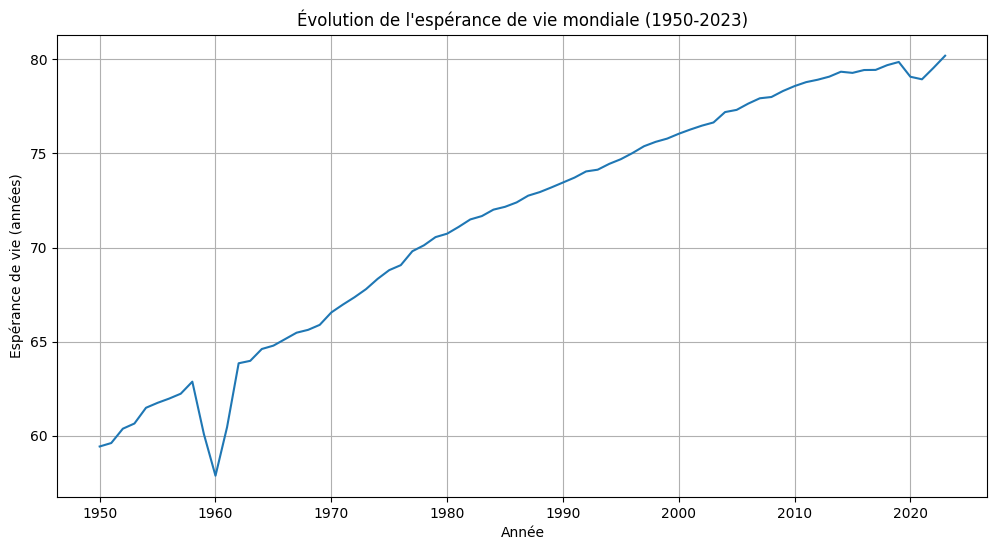

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df_global, x='year', y='life_expectancy')
plt.title("Évolution de l'espérance de vie mondiale (1950-2023)")
plt.xlabel("Année")
plt.ylabel("Espérance de vie (années)")
plt.grid(True)
plt.show()


**Visualiser les différences continental**

In [70]:
country_to_continent = {
    'France': 'Europe',
    'United States': 'North America',
    'China': 'Asia'
}

In [71]:
df['continent'] = df['country'].map(country_to_continent)

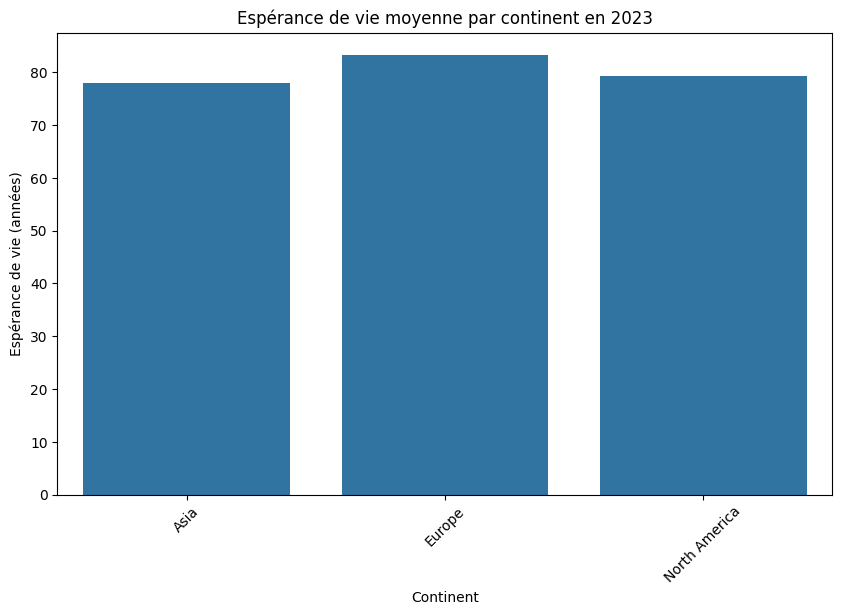

In [72]:
df_region = df[df['year'] == 2023].groupby('continent')['life_expectancy'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=df_region, x='continent', y='life_expectancy')
plt.title("Espérance de vie moyenne par continent en 2023")
plt.xlabel("Continent")
plt.ylabel("Espérance de vie (années)")
plt.xticks(rotation=45)
plt.show()
